### 서울시 유가 정보 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# file name 합치기
from glob import glob 

In [2]:
station_files = glob("./Data/oil/*.xls")

In [3]:
# 파일 이름을 정렬
station_files = sorted(station_files)
station_files

['./Data/oil\\지역_위치별(주유소) (1).xls',
 './Data/oil\\지역_위치별(주유소) (10).xls',
 './Data/oil\\지역_위치별(주유소) (11).xls',
 './Data/oil\\지역_위치별(주유소) (12).xls',
 './Data/oil\\지역_위치별(주유소) (13).xls',
 './Data/oil\\지역_위치별(주유소) (14).xls',
 './Data/oil\\지역_위치별(주유소) (15).xls',
 './Data/oil\\지역_위치별(주유소) (16).xls',
 './Data/oil\\지역_위치별(주유소) (17).xls',
 './Data/oil\\지역_위치별(주유소) (18).xls',
 './Data/oil\\지역_위치별(주유소) (19).xls',
 './Data/oil\\지역_위치별(주유소) (2).xls',
 './Data/oil\\지역_위치별(주유소) (20).xls',
 './Data/oil\\지역_위치별(주유소) (21).xls',
 './Data/oil\\지역_위치별(주유소) (22).xls',
 './Data/oil\\지역_위치별(주유소) (23).xls',
 './Data/oil\\지역_위치별(주유소) (24).xls',
 './Data/oil\\지역_위치별(주유소) (3).xls',
 './Data/oil\\지역_위치별(주유소) (4).xls',
 './Data/oil\\지역_위치별(주유소) (5).xls',
 './Data/oil\\지역_위치별(주유소) (6).xls',
 './Data/oil\\지역_위치별(주유소) (7).xls',
 './Data/oil\\지역_위치별(주유소) (8).xls',
 './Data/oil\\지역_위치별(주유소) (9).xls',
 './Data/oil\\지역_위치별(주유소).xls']

In [4]:
# xls를 읽기 위해
#!pip install xlrd

In [5]:
tmp_raw = []
for file_name in station_files:
  tmp = pd.read_excel(file_name, header=2)
  tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [6]:
len(station_raw)

428

In [7]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1648,1487,-
1,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1659,1489,-
2,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,1875,1675,1495,-
3,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,1959,1689,1569,1600
4,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1895,1696,1578,1500


In [8]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      428 non-null    object
 1   상호      428 non-null    object
 2   주소      428 non-null    object
 3   상표      428 non-null    object
 4   전화번호    428 non-null    object
 5   셀프여부    428 non-null    object
 6   고급휘발유   428 non-null    object
 7   휘발유     428 non-null    int64 
 8   경유      428 non-null    int64 
 9   실내등유    428 non-null    object
dtypes: int64(2), object(8)
memory usage: 36.8+ KB


In [9]:
# 필요항목 발췌
stations = pd.DataFrame(
  {
    'Oil_store' : station_raw['상호'],
    '주소' : station_raw['주소'],
    '가격' : station_raw['휘발유'],
    '셀프' : station_raw['셀프여부'],
    '상표' : station_raw['상표']
  }
)
stations.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1648,N,HD현대오일뱅크
1,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1659,Y,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1675,Y,SK에너지
3,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1689,Y,SK에너지
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스


In [10]:
# 주소 컬럼에 서울특별시로 입력되어 있는 부분 확인
[region.split()[0] for region in stations['주소']]

['서울',
 '서울특별시',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울특별시',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울특별시',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울특별시',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울특별시',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울시

In [11]:
# 주소 컬럼에 주소의 앞부분의 unique 확인 
set([region.split()[0] for region in stations['주소']])

{'서울', '서울시', '서울특별시'}

In [12]:
test = "서울 강동구 구천면로 357 (암사동)"
test.split()[0]

'서울'

In [13]:
# 주소의 서울특별시, 서울시 -> 서울로 변경
stations['주소'] = stations['주소'].str.replace("서울특별시", "서울")
stations['주소'] = stations['주소'].str.replace("서울시", "서울")

In [14]:
# 작업결과 확인
set([region.split()[0] for region in stations['주소']])

{'서울'}

In [15]:
stations.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1648,N,HD현대오일뱅크
1,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),1659,Y,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1675,Y,SK에너지
3,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1689,Y,SK에너지
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스


In [23]:
# 연습
stations.iloc[0,1].split()[1]

'강동구'

In [25]:
# 반복문으로 연습
guName = []
for region in stations['주소']:
  # print(region)
  guName.append(region.split()[1])

guName

['강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동작구',
 '동작구',
 '동작구',
 '동작구',
 '동작구',
 '동작구',
 '동작구',
 '동작구',
 '동작구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '성북구',
 '

In [27]:
# Listed For 문
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1648,N,HD현대오일뱅크,강동구
1,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),1659,Y,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1675,Y,SK에너지,강동구
3,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1689,Y,SK에너지,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스,강동구


In [29]:
# 구 컬럼 확인
len(stations['구'].unique())

25

In [30]:
# 
stations.tail()

,Oil_store,주소,가격,셀프,상표,구
25,대청주유소,서울 강남구 개포로 654 (일원동),2216,N,SK에너지,강남구
26,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2258,N,HD현대오일뱅크,강남구
27,SK논현주유소,서울 강남구 논현로 747 (논현동),2326,N,SK에너지,강남구
28,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2474,N,HD현대오일뱅크,강남구
29,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2593,N,GS칼텍스,강남구


In [32]:
# 여러개의 파일을 합하여 만든 데이터셋이기 때문에 index가 중복되어 있다.
# -> 인덱스를 재배열
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,(주)소모 성내주유소,서울 강동구 올림픽로 578 (성내동),1740,Y,GS칼텍스,강동구
8,경동주유소,서울 동대문구 이문로 191,1655,Y,S-OIL,동대문구
8,살피재주유소,서울 동작구 상도로 334,1835,N,SK에너지,동작구
8,(주)만성상사 대흥주유소,서울 마포구 대흥로 61 (대흥동),1699,N,SK에너지,마포구
8,광호주유소,서울 서대문구 연희로 266 (홍은동),1639,N,SK에너지,서대문구
8,HD현대오일뱅크㈜직영 사평로주유소,서울 서초구 사평대로 350 (서초동),1690,N,HD현대오일뱅크,서초구
8,동일주유소,서울 성동구 광나루로 254 (성수동2가),1649,N,GS칼텍스,성동구
8,지에스칼텍스(주) 종암주유소,서울 성북구 종암로 145 (종암동),1605,Y,GS칼텍스,성북구
8,삼화주유소,서울 송파구 백제고분로 125,1663,Y,GS칼텍스,송파구
8,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1599,Y,SK에너지,양천구


In [33]:
# index 재구성
stations.reset_index(drop=True, inplace=True)

In [34]:
# 확인
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,(주)소모 성내주유소,서울 강동구 올림픽로 578 (성내동),1740,Y,GS칼텍스,강동구


In [35]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  428 non-null    object
 1   주소         428 non-null    object
 2   가격         428 non-null    int64 
 3   셀프         428 non-null    object
 4   상표         428 non-null    object
 5   구          428 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.2+ KB


In [36]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

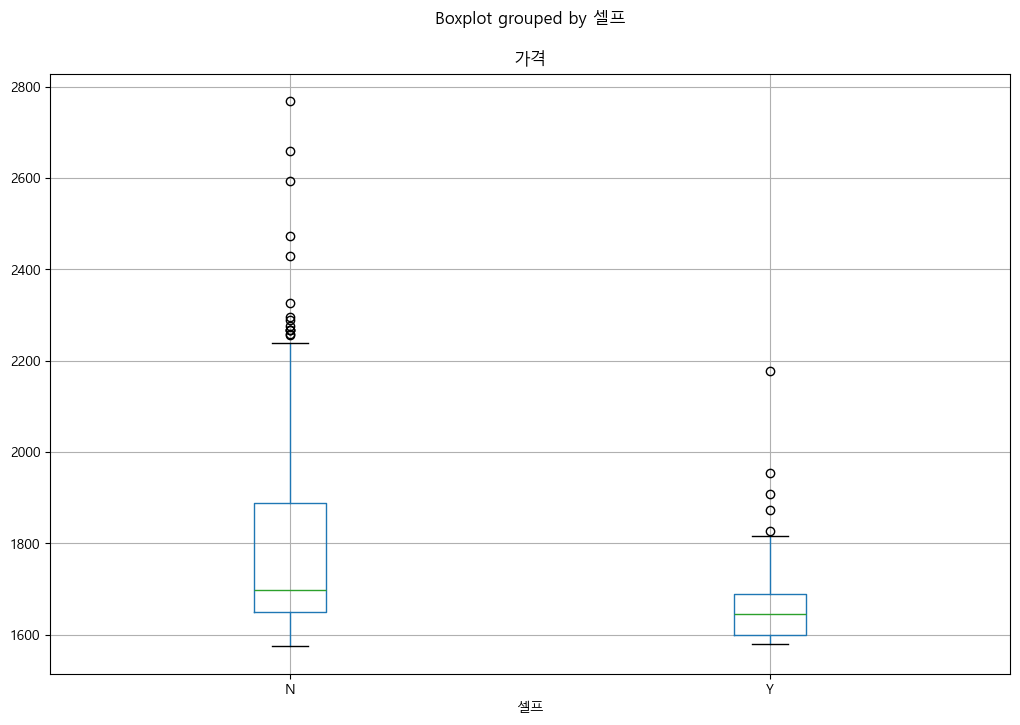

In [37]:
# boxplot 그리기
stations.boxplot(
  column='가격',
  by='셀프',
  figsize=(12, 8)
)
plt.show()

In [38]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

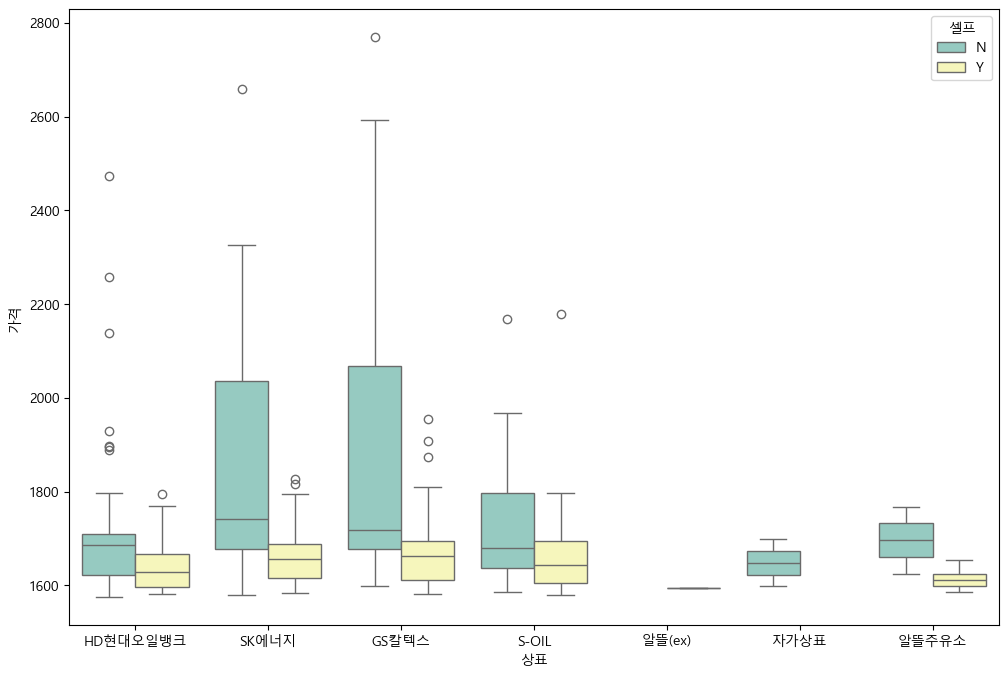

In [47]:
# 상표, 가격, 셀프를 boxplot으로 그리기

plt.figure(figsize=(12,8))
sns.boxplot(
  data=stations,
  x='상표',
  y='가격',
  hue='셀프',
  palette='Set3' # Set1, Set2
)

plt.show()

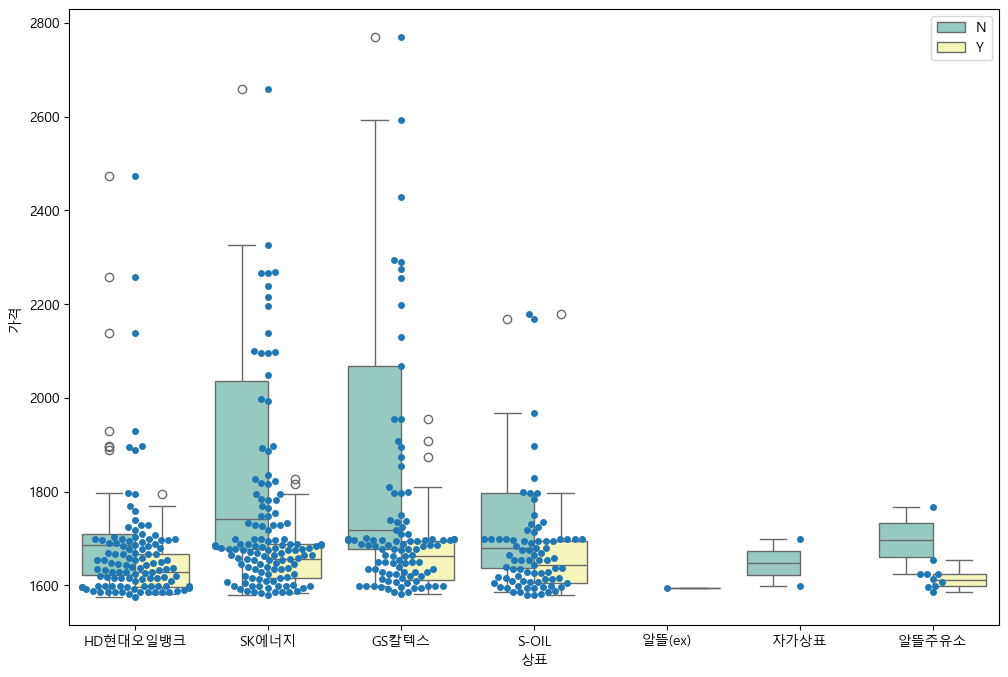

In [48]:
# 상표, 가격, 셀프를 boxplot과 산포도 동시에 그리기


plt.figure(figsize=(12,8))
sns.boxplot(
  data=stations,
  x='상표',
  y='가격',
  hue='셀프',
  palette='Set3' # Set1, Set2
)

sns.swarmplot(
  data=stations,
  x='상표',
  y='가격',
)

plt.show()

### 가격이 높은 순으로 정렬(top10)

In [50]:
stations.sort_values(
  by='가격',
  ascending=False
).head(10)

,Oil_store,주소,가격,셀프,상표,구
235,서계주유소,서울 용산구 청파로 367 (청파동),2769,N,GS칼텍스,용산구
268,서남주유소,서울 중구 통일로 30,2659,N,SK에너지,중구
427,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2593,N,GS칼텍스,강남구
426,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2474,N,HD현대오일뱅크,강남구
267,필동주유소,서울 중구 퇴계로 196 (필동2가),2429,N,GS칼텍스,중구
425,SK논현주유소,서울 강남구 논현로 747 (논현동),2326,N,SK에너지,강남구
212,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295,N,GS칼텍스,영등포구
357,구로주유소,서울 구로구 구로동로 137 (구로동),2290,N,GS칼텍스,구로구
258,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2275,N,GS칼텍스,종로구
257,SK북악주유소,서울 종로구 평창문화로 137,2268,N,SK에너지,종로구


In [51]:
# 가격이 낮은 순으로 정렬(top10)
stations.sort_values(
  by='가격',
  ascending=True
).head(10)

,Oil_store,주소,가격,셀프,상표,구
236,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1574,N,HD현대오일뱅크,은평구
37,(주)타이거통상 월드컵주유소,서울 마포구 월드컵북로 170 (성산제2동),1579,Y,S-OIL,마포구
95,(주)서울에너지 직영,서울 성동구 천호대로 324 (용답동),1579,Y,S-OIL,성동구
38,마포시엠주유소,서울 마포구 월드컵북로 62,1579,N,SK에너지,마포구
162,플라트(주)서호주유소,서울 양천구 남부순환로 317,1582,Y,GS칼텍스,양천구
164,현대주유소,서울 양천구 남부순환로 372 (신월동),1582,Y,S-OIL,양천구
163,HD현대오일뱅크㈜직영 남부순환셀프주유소,서울 양천구 남부순환로 553 (신월동),1582,Y,HD현대오일뱅크,양천구
165,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1584,Y,SK에너지,양천구
216,(주)서울에너지 시민주유소,서울 강북구 인수봉로 185 (수유동),1585,Y,HD현대오일뱅크,강북구
345,개봉주유소,서울 구로구 고척로 115 (개봉동),1585,Y,HD현대오일뱅크,구로구


In [53]:
# 가장 비싼 가격와 싼 가격 차이
stations['가격'].max() - stations['가격'].min()

1195

# 구별 가격 평균

In [56]:
gu_data = \
  pd.pivot_table(
    stations,
    index=['구'],
    values=['가격'],
    aggfunc='mean'
  )
gu_data.head()

,가격
구,
강남구,1907.166667
강동구,1748.538462
강북구,1603.272727
강서구,1671.906250
관악구,1707.000000


In [57]:
# 구별 가격 평균 높은순 (top10)
gu_data.sort_values(
  by='가격',
  ascending=False
).head(10)

,가격
구,
용산구,2049.333333
중구,1979.500000
강남구,1907.166667
종로구,1859.250000
강동구,1748.538462
성동구,1735.312500
서초구,1728.677419
영등포구,1713.222222
관악구,1707.000000


# 지도표시

In [58]:
import json
import folium

In [63]:
geo_path = "./Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(
  location = [37.5502, 126.982],
  zoom_start = 11
)

folium.Choropleth(
  geo_data = geo_str,
  data = gu_data,
  columns = [gu_data.index, '가격'],
  fill_color = 'PuRd',
  key_on = 'feature.id'
).add_to(map)

map


### 가장 비싼 주유소 Top10과 가장 싼 주유소 Top10

In [64]:
# 위도 경도 데이터 불러오기
stations_latlng = pd.read_csv("./Data/stations_latlng.csv")
stations_latlng.head()

,lat,lng
0,37.550458,127.138254
1,37.536425,127.149374
2,37.546047,127.155538
3,37.558705,127.171450
4,37.533417,127.141192


In [65]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1648,N,HD현대오일뱅크,강동구
1,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),1659,Y,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1675,Y,SK에너지,강동구
3,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1689,Y,SK에너지,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스,강동구


In [68]:
# 기존 stations에 index 기준으로 위도 경도 데이터 병합하기
stations = \
  pd.merge(stations, stations_latlng, left_index=True, right_index=True)

stations.head()

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1648,N,HD현대오일뱅크,강동구,37.550458,127.138254
1,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),1659,Y,HD현대오일뱅크,강동구,37.536425,127.149374
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1675,Y,SK에너지,강동구,37.546047,127.155538
3,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1689,Y,SK에너지,강동구,37.558705,127.171450
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스,강동구,37.533417,127.141192


In [70]:
# 가격이 제일 비싼 Top10 구성
oil_price_top10 = \
  stations.sort_values(
    by='가격',
    ascending=False
  ).head(10)

oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
235,서계주유소,서울 용산구 청파로 367 (청파동),2769,N,GS칼텍스,용산구,37.552351,126.968993
268,서남주유소,서울 중구 통일로 30,2659,N,SK에너지,중구,37.558388,126.972176
427,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2593,N,GS칼텍스,강남구,37.511560,127.047139
426,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2474,N,HD현대오일뱅크,강남구,37.517684,127.035844
267,필동주유소,서울 중구 퇴계로 196 (필동2가),2429,N,GS칼텍스,중구,37.560918,126.993679
425,SK논현주유소,서울 강남구 논현로 747 (논현동),2326,N,SK에너지,강남구,37.518508,127.028251
212,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295,N,GS칼텍스,영등포구,37.530376,126.925570
357,구로주유소,서울 구로구 구로동로 137 (구로동),2290,N,GS칼텍스,구로구,37.491016,126.883518
258,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2275,N,GS칼텍스,종로구,37.574542,126.966630
257,SK북악주유소,서울 종로구 평창문화로 137,2268,N,SK에너지,종로구,37.609856,126.974885


In [71]:
# 가격이 제일 싼 Top10 구성
oil_price_bottom10 = \
  stations.sort_values(
    by='가격',
    ascending=True
  ).head(10)

oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
236,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1574,N,HD현대오일뱅크,은평구,37.643969,126.912362
37,(주)타이거통상 월드컵주유소,서울 마포구 월드컵북로 170 (성산제2동),1579,Y,S-OIL,마포구,37.567470,126.909884
95,(주)서울에너지 직영,서울 성동구 천호대로 324 (용답동),1579,Y,S-OIL,성동구,37.564238,127.055597
38,마포시엠주유소,서울 마포구 월드컵북로 62,1579,N,SK에너지,마포구,37.559781,126.917194
162,플라트(주)서호주유소,서울 양천구 남부순환로 317,1582,Y,GS칼텍스,양천구,37.538585,126.827021
164,현대주유소,서울 양천구 남부순환로 372 (신월동),1582,Y,S-OIL,양천구,37.533910,126.829178
163,HD현대오일뱅크㈜직영 남부순환셀프주유소,서울 양천구 남부순환로 553 (신월동),1582,Y,HD현대오일뱅크,양천구,37.519737,126.838734
165,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1584,Y,SK에너지,양천구,37.516747,126.854738
216,(주)서울에너지 시민주유소,서울 강북구 인수봉로 185 (수유동),1585,Y,HD현대오일뱅크,강북구,37.636198,127.012786
345,개봉주유소,서울 구로구 고척로 115 (개봉동),1585,Y,HD현대오일뱅크,구로구,37.501898,126.846853


In [78]:
# 지도 표시
map = folium.Map(
  location = [37.5502, 126.982],
  zoom_start = 11
)

for n in oil_price_top10.index:
  popup = folium.Popup(
    oil_price_top10['Oil_store'][n], max_width=200
  )

  folium.Marker(
    [oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
    popup = popup,
    icon=folium.Icon(color='red')
  ).add_to(map)

for n in oil_price_bottom10.index:
  popup = folium.Popup(
    oil_price_bottom10['Oil_store'][n], max_width=200
  )
  
  folium.Marker(
    [oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
    popup = popup,
    icon=folium.Icon(color='blue')
  ).add_to(map)


map